# K-means clustring by Sachin Kapase

**In the notebook I have implement K-means algoritham from scratch and compared the outcome with the sklearn kmeans algoritham**

**Steps -**
- scaling the data
- generate random centroids
- calculate the distance between the data points and centroids (WCSS)
- update the centroid
- repeat step 3 and 4 until centroids stop changing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d stefanoleone992/fifa-22-complete-player-dataset

Saving kaggle.json to kaggle.json
100% 109M/109M [00:01<00:00, 108MB/s] 
100% 109M/109M [00:01<00:00, 95.4MB/s]


In [3]:
! unzip /content/fifa-22-complete-player-dataset.zip

Archive:  /content/fifa-22-complete-player-dataset.zip
  inflating: Career Mode female player datasets - FIFA 16-22.xlsx  
  inflating: Career Mode player datasets - FIFA 15-22.xlsx  
  inflating: female_players_16.csv   
  inflating: female_players_17.csv   
  inflating: female_players_18.csv   
  inflating: female_players_19.csv   
  inflating: female_players_20.csv   
  inflating: female_players_21.csv   
  inflating: female_players_22.csv   
  inflating: players_15.csv          
  inflating: players_16.csv          
  inflating: players_17.csv          
  inflating: players_18.csv          
  inflating: players_19.csv          
  inflating: players_20.csv          
  inflating: players_21.csv          
  inflating: players_22.csv          


In [4]:
players = pd.read_csv('/content/players_22.csv')
players.head()

<ipython-input-4-96399b96ee49>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('/content/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
players.shape

(19239, 110)

In [6]:
features = ['overall','potential','value_eur','wage_eur','age']

In [7]:
players_subset = players.dropna(subset = features)

In [8]:
data = players_subset[features].copy()

In [9]:
data.copy()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


**Minmax_scaler**

In [10]:
data = ((data-data.min())/(data.max() - data.min()))*9+1

In [11]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [12]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


**Generate Random Centroids**

In [13]:
def centroid_generator(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [14]:
centroids = centroid_generator(data, 5)
centroids

,0,1,2,3,4
overall,3.347826,5.891304,3.543478,4.717391,4.521739
potential,5.695652,3.739130,7.456522,4.130435,6.086957
value_eur,1.166601,1.013501,1.036698,1.022779,1.036698
wage_eur,1.347639,1.141631,1.064378,1.038627,2.969957
age,3.666667,3.000000,5.000000,2.333333,4.000000


**Calculate the distance between the centroid and data points**

In [15]:
def get_lebals(data, centroids):
    distances = centroids.apply(lambda x : np.sqrt(((data - x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_lebals(data, centroids)
labels

0        4
1        4
2        4
3        4
4        4
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [17]:
labels.value_counts()

0    10789
4     5187
3     1505
2      864
1      820
dtype: int64

**According to distance calculation generate new centroids**

In [18]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

**Plotting the centroids with data points**

In [19]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data2d = pca.fit_transform(data)
  centroids2d = pca.transform(centroids.T)
  # return centroids2d, data2d
  clear_output(wait = True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x = data2d[:,0], y=data2d[:,1], c=labels)
  plt.scatter(x = centroids2d[:,0], y=centroids2d[:,1])
  plt.show()
# plot_clusters(data, labels, centroids, iteration)

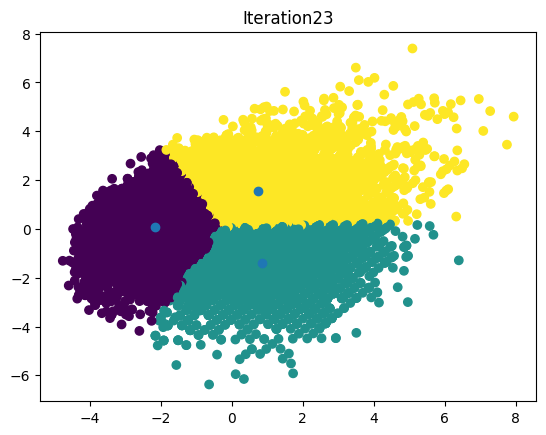


 We got the prefect centroids at iteration :24


In [20]:
max_iteration = 100
k = 3
centroids = centroid_generator(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_lebals(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration = iteration + 1
print('\n We got the prefect centroids at iteration :{}'.format(iteration)) 

**Centroids calculated from scratch**

In [21]:
centroids

,0,1,2
overall,3.206838,4.784633,5.806043
potential,4.928473,4.506962,6.497993
value_eur,1.026614,1.044980,1.285501
wage_eur,1.028505,1.118904,1.420001
age,2.518708,5.472247,3.596161


**Sklearn Kmeans centroids**

In [22]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
centroids_sklearn = kmeans.cluster_centers_

In [27]:
pd.DataFrame(centroids_sklearn, columns = features).T

,0,1,2
overall,4.800991,3.599859,6.231096
potential,4.503972,5.205869,6.623746
value_eur,1.040011,1.035792,1.413686
wage_eur,1.112902,1.039947,1.657093
age,5.609167,2.712386,4.139879
